## Taner Bulbul
INST 447

## Exercise 1

You are given some files with format cityname_month_day_year.txt. 

In [413]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

1. Create a empty dataframe and name it city_df. Create a column in city_df named City. Extract the city names from the file names and keep their values in the City column. The number of rows must be same as the number of files.

In [439]:
import os
city_df = pd.DataFrame(columns=['City']) # empty dataframe with City column
filenames = os.listdir('.') # list of all files in this directory
textfiles = [f for f in filenames if os.path.isfile('./'+f) and 
                    os.path.splitext('./'+f)[1] == '.txt']

cities = city_df.City = [c[slice(c.find('_'))] for c in textfiles ]

city_df
#textfiles

,my_City
0,Annapolis
1,Atlanta
2,Baltimore
3,Boston
4,Chicago
5,Cincinnati
6,CollegePark
7,Dallas
8,Houston
9,LasVegas


2. Extract the month from the file names. Convert the numerical month to the month name (like "January"). Create a column in city_df and add the months to that column.

In [415]:
import datetime
#extract date time from file names, e.g. 02_03_2023
dts = [f[len(c)+1:f.find('.txt')] for (f,c) in zip(textfiles,cities)]
#convert from string to date time obect
dt = [datetime.datetime.strptime(d,"%m_%d_%Y") for d in dts]

#create a new column called MOnth with month names
city_df['Month'] = [d.strftime("%B") for d in dt]

city_df

,City,Month
0,Annapolis,February
1,Atlanta,January
2,Baltimore,February
3,Boston,February
4,Chicago,February
5,Cincinnati,February
6,CollegePark,May
7,Dallas,February
8,Houston,February
9,LasVegas,October


3. Extract date and year from the file names. Create two columns in city_df named "Date" and "Year" and the date and year to the respective columns.

In [416]:
city_df['Day'] = [d.day for d in dt] # did we mean Day and not Date?
city_df['Year'] = [d.year for d in dt]
city_df

,City,Month,Day,Year
0,Annapolis,February,3,2023
1,Atlanta,January,3,2023
2,Baltimore,February,3,2023
3,Boston,February,3,2023
4,Chicago,February,3,2023
5,Cincinnati,February,3,2023
6,CollegePark,May,3,2023
7,Dallas,February,3,2023
8,Houston,February,3,2023
9,LasVegas,October,3,2023


4. In each file, there are three lines which have Population, State and Decription. Create three columns named "Population", "State" and "Description" in city_df and fill the columns with respective data.

In [417]:
import re
state_name=[]
population =[]
description=[]
for fname in textfiles:
    with open(fname) as f:
        f_content = f.readline() #read the line from the file
        #Use regex to get population
        pop_match = re.search(r"\d+",f_content)
        population.append(pop_match[0])
        
        #Use find and slicing to get state name
        s_idx = f_content.find('of')
        e_idx = f_content.find('.')
        state_name.append(f_content[s_idx+3:e_idx])
        
        #Use find and slicing to get description
        s_idx = f_content.find('having')
        desc = f_content[s_idx +len('having '):]
        e_idx = desc.find('.')
        description.append(desc[0:e_idx])

city_df['Population']= population
city_df['State']= state_name
city_df['Description']= description

city_df

,City,Month,Day,Year,Population,State,Description
0,Annapolis,February,3,2023,913631,Maryland,Historic places
1,Atlanta,January,3,2023,200456,Georgia,Georgia Tech University
2,Baltimore,February,3,2023,721392,Maryland,Museums
3,Boston,February,3,2023,946686,Massachusetts,MIT
4,Chicago,February,3,2023,240466,Illinois,Architecture
5,Cincinnati,February,3,2023,223402,Ohio,University of Cincinnati
6,CollegePark,May,3,2023,457893,Maryland,University of Maryland
7,Dallas,February,3,2023,249928,Texas,University of Texas at Dallas
8,Houston,February,3,2023,525658,Texas,Graffiti
9,LasVegas,October,3,2023,74356,Nevada,casinos


## Exercise 2

You have been given a dataset housing.csv.

1. Create box plot for each of the features against the price of the house.

In [418]:
hs_df = pd.read_csv('Housing.csv')
hs_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [419]:
type(hs_df.at[4,'bedrooms'])

numpy.int64

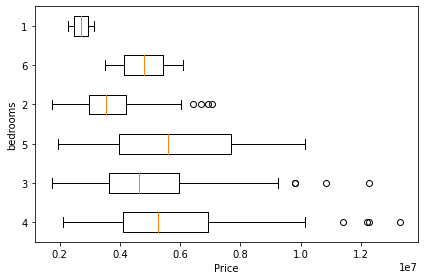

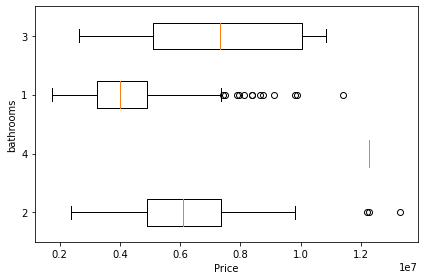

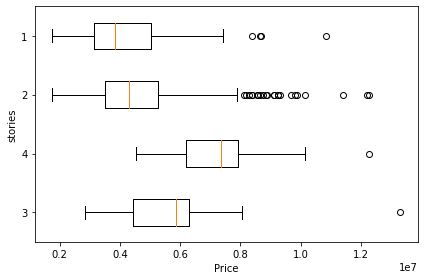

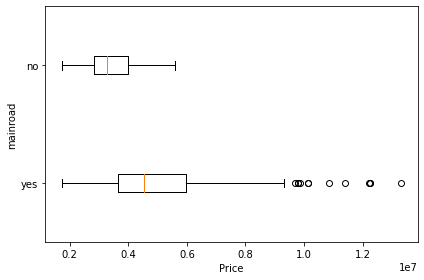

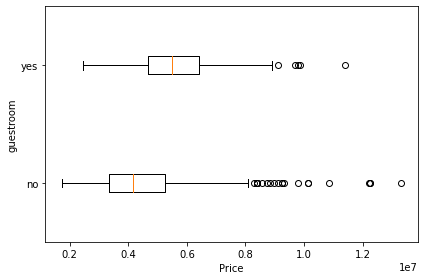

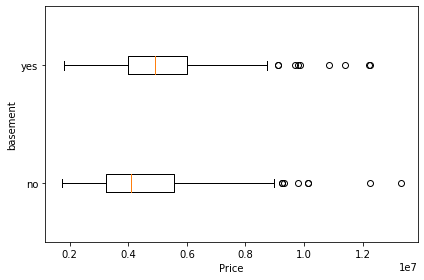

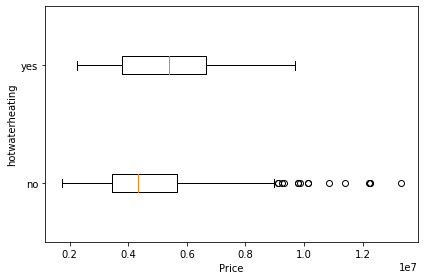

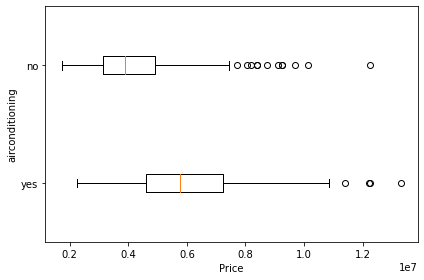

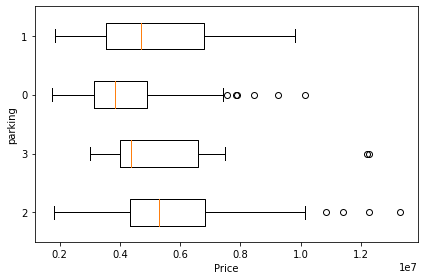

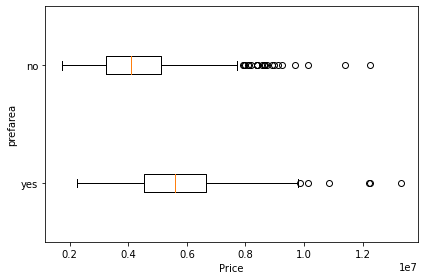

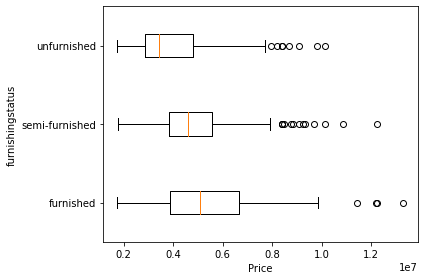

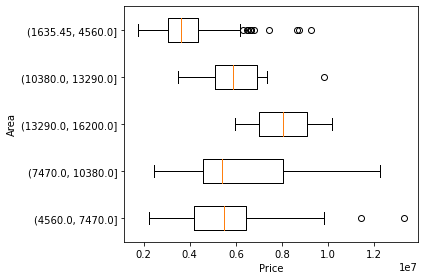

In [420]:
#select columns from bedrooms .. furnishingstatus
cols = hs_df.columns[2:len(hs_df.columns)]
#iterate each column and draw box plots for column vs price
for col in cols:
    attributes = hs_df[col].unique() # unique values in columns
    box_sr = pd.Series('',index = attributes) # cerate a Series
    for poss in attributes:
        BM = hs_df[col] == poss #filter the unique values
        box_sr[poss] = hs_df[BM].price.values #assign the price

    plt.boxplot(box_sr,vert=False) # draw box plot
    plt.yticks([i for i in range(1,len(attributes)+1)],attributes)
    plt.ylabel(col)
    plt.xlabel('Price')
    plt.tight_layout()
    plt.show()

#plot area vs price separately
box_sr = pd.Series('',index = [0,1,2,3,4]) # create a Series
area_disc = pd.cut(hs_df['area'], bins=5) # group 5 areas
area_invl = area_disc.unique() #get unique area intervals

for i in range(0,5):
    #Create filters for the area intervals and assign prices
    BM1 = hs_df['area'] > area_invl[i].left 
    BM2 = hs_df['area'] <= area_invl[i].right
    BM = BM1 & BM2
    box_sr[i] = hs_df[BM].price.values

plt.boxplot(box_sr,vert=False)
plt.yticks([1,2,3,4,5],area_invl)
plt.ylabel('Area')
plt.xlabel('Price')
plt.tight_layout()
plt.show()

2. For the columns "mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea" replace all yes with 1 and no with 0. For the column furnishing status, replace the column values in the format for three digits. 

For example, furnishingstatus = 001 means that the house is not furnished.
furnishingstatus = 010 means that the house is semi-furnished.
furnishingstatus = 100 means that the house is furnished.

I used 1,2,4 for furnishing status assuming 001,010,100 are binary values?

In [440]:
hs_df = hs_df.replace(to_replace=["yes", "no"],
           value=[1,0])
hs_df = hs_df.replace(to_replace=["furnished", "semi-furnished","unfurnished"],
           value=[4,2,1])
hs_df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,4
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,4
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,4
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,2
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,4


3. Using Linear Regression function, predict the price of the house. Using the coefficients predicted by the model, form the equation of linear regression using all the features. Write down the equation

In [428]:
from sklearn.linear_model import LinearRegression
X = hs_df.drop(columns=['price'])
y = hs_df.price
lm = LinearRegression()
lm.fit(X,y)

LinearRegression()

In [429]:
print('intercept (b0) ', lm.intercept_)
coef_names = ['B'+ str(i) for i in range(1,13)]
eq_df = pd.DataFrame({'Predictor': X.columns,
'coefficient Name':coef_names,
'coefficient Value': lm.coef_})
eq_df

intercept (b0)  -422796.26522529963


,Predictor,coefficient Name,coefficient Value
0,area,B1,244.491219
1,bedrooms,B2,122685.826403
2,bathrooms,B3,992040.775295
3,stories,B4,451281.844607
4,mainroad,B5,430655.097380
5,guestroom,B6,300120.036311
6,basement,B7,364708.009026
7,hotwaterheating,B8,883548.796164
8,airconditioning,B9,853521.765078
9,parking,B10,283765.977431


In [430]:
equation = 'price =' + str(lm.intercept_)
for i in range (0,len(lm.coef_)):
    equation += ' + '+ str(lm.coef_[i]) +'*' + eq_df['Predictor'][i]
equation

'price =-422796.26522529963 + 244.49121929652338*area + 122685.82640250586*bedrooms + 992040.7752945808*bathrooms + 451281.84460667113*stories + 430655.09737964545*mainroad + 300120.0363108141*guestroom + 364708.0090257905*basement + 883548.7961636132*hotwaterheating + 853521.7650777645*airconditioning + 283765.977431062*parking + 647026.0483050195*prefarea + 121607.83545928239*furnishingstatus'

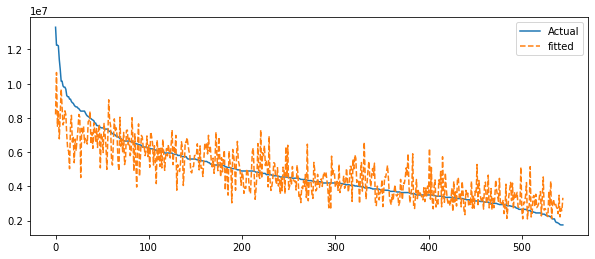

In [431]:
plt.figure(figsize=(10,4))
plt.plot(X.index,y, label='Actual')
plt.plot(X.index,lm.predict(X), label='fitted', linestyle='--')
plt.legend()
plt.show()